In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Ozone.csv')

In [4]:
data.shape

(2534, 74)

In [6]:
#We only need the input variables and numerical variables
#so we will drop the output ‘Class’ and the categorical variable ‘id’.
data.drop(columns=['id', 'Class'], inplace=True)

In [6]:
data.shape

(2534, 72)

In [8]:
#step-1 : STANDARISATION
data = (data - np.mean(data, axis=0))/np.std(data)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72
0,-0.703472,0.179373,0.733142,0.505957,0.423468,0.505817,-0.126209,-0.317853,-0.573011,-0.476334,...,-1.315377e+00,-0.637188,8.740067e-02,-3.393908e-01,-3.077883e-01,-1.122120e+00,-1.780258e+00,3.224584e+00,-1.582173e+00,-0.282442
1,0.971104,1.354772,1.505395,1.035205,1.576666,1.503695,1.155144,0.689381,0.503003,0.480320,...,-1.051700e+00,0.721899,-1.624465e-01,4.273963e-01,-1.785807e-01,1.756277e-01,-7.662740e-01,2.154919e+00,-1.582173e+00,-0.282442
2,1.054833,1.018944,0.904754,0.505957,0.600883,0.868682,0.789043,0.597815,-0.304007,-0.302397,...,-1.420848e+00,1.216113,-3.213405e-01,1.273702e+00,-3.723921e-01,3.666920e-01,3.573304e-01,1.376981e+00,-1.149728e+00,-0.282442
3,2.561951,1.858515,1.848619,2.005493,1.221836,1.412979,1.063618,0.414681,-0.124672,0.219415,...,-1.658157e+00,0.763084,-1.251886e-01,1.378780e+00,-5.662034e-01,1.024251e+00,1.307370e+00,5.990427e-01,-1.149728e+00,1.296692
4,0.803647,0.431244,0.046695,-0.111499,-0.552314,-0.038479,-0.400785,-0.592553,-1.111017,-1.259051,...,-8.220399e-08,0.000001,-2.456299e-08,-2.331137e-08,-1.611217e-09,5.836175e-09,-3.550896e-08,2.913965e-10,1.337951e-08,0.157894


In [7]:
def PCA(X, n_components):
    #step-1 : STANDARISATION
    X = (X - np.mean(X, axis=0))/np.std(X)
    
    #step-2 : CALCULATE COVARIANCE MATRIX
    cov_matrix = np.cov(X, rowvar=False, bias=False)
    
    #step-3 : COMPUTE THE EIGENVECTORS AND EIGENVALUES
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    #SORT THE EIGEN VECTORS
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]
    
    #SELECT A SUBSET (n_components = 2) FROM THE REARRANGED EIGENVALUE MATRIX
    eigenvectors_subset = sorted_eigenvectors[:, 0:n_components]
    
    #TRANSFORM THE DATA
    X_pca = np.dot(eigenvectors_subset.transpose(), X.transpose()).transpose()
    
    return X_pca

In [8]:
X_pca = PCA(data, 2)

In [9]:
#step-2 : CALCULATE COVARIANCE MATRIX
cov_matrix = np.cov(data, rowvar=False, bias=False)

In [10]:
#step-3 : COMPUTE THE EIGENVECTORS AND EIGENVALUES
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [11]:
#SORT THE EIGEN VECTORS
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

In [34]:
#CALCULATE THE EXPLAINED VARIANCE 
explained_variance = (sorted_eigenvalues/np.sum(eigenvalues))*100
#print(explained_variance[:k])

total_explained_variance = []
for i in range(1, len(explained_variance)+1):
    total_explained_variance.append(np.sum(explained_variance[0:i]))
print(np.round(total_explained_variance, 3))

[ 41.834  62.17   69.619  74.111  77.909  80.634  82.887  84.503  86.019
  87.341  88.612  89.726  90.762  91.718  92.507  93.278  93.944  94.472
  94.942  95.357  95.759  96.122  96.455  96.751  97.018  97.27   97.494
  97.698  97.892  98.067  98.229  98.384  98.535  98.665  98.791  98.905
  99.007  99.105  99.202  99.296  99.386  99.466  99.54   99.608  99.67
  99.731  99.785  99.815  99.839  99.862  99.882  99.901  99.915  99.927
  99.937  99.947  99.954  99.961  99.966  99.97   99.975  99.978  99.982
  99.986  99.989  99.991  99.993  99.995  99.997  99.998  99.999 100.   ]


In [23]:
#SELECT A SUBSET (K = 2) FROM THE REARRANGED EIGENVALUE MATRIX
k = 5
eigenvectors_subset = sorted_eigenvectors[:, 0:k]

In [24]:
#TRANSFORM THE DATA
data_reduced = np.dot(eigenvectors_subset.transpose(), data.transpose()).transpose()

Text(0.5, 0, 'Magnitude of the eigenvalue')

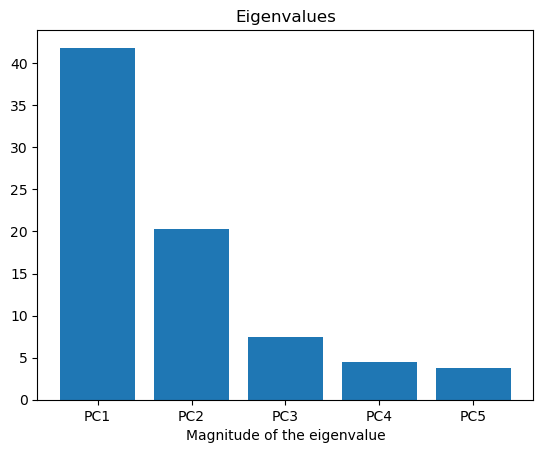

In [25]:
plt.bar(["PC" + str(i+1) for i in range(len(sorted_eigenvalues[:k]))], explained_variance[:k])
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

In [32]:
#DETERMINE THE EXPLAINED VARIANCE
total_explained_variance = sum(explained_variance[:k])
print(str(np.round(total_explained_variance, 3)) + "%")

77.909%
